# Data Understanding

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [6]:
df_price = pd.read_excel('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/data/SP500_Price_Data.xlsx')

In [41]:
# Import ESG Risk Data
df_esg = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/data/SP500_ESG_Data.csv')

In [42]:
df_esg.head()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05


In [7]:
df_price.head()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2012-01-03 16:00:00,83.49,27.14,35.00,18.25,52.95,12.20,28.57,5.48,69.10,...,102.78,113.97,27.34,32.44,25.14,42.12,35.72,53.94,16.77,31.01
1,2012-01-04 16:00:00,84.18,27.03,35.32,18.11,52.93,12.11,28.28,5.46,70.72,...,102.20,112.01,27.16,32.10,25.97,42.40,35.45,53.21,17.14,31.02
2,2012-01-05 16:00:00,83.80,26.97,33.36,18.27,51.92,12.11,28.48,5.46,71.17,...,103.97,110.84,27.28,32.38,25.60,42.73,35.40,53.84,17.62,31.04
3,2012-01-06 16:00:00,83.37,26.73,33.80,18.14,51.83,12.24,28.72,5.43,71.50,...,103.10,106.94,27.20,32.17,25.17,43.04,35.11,53.98,17.64,31.03
4,2012-01-09 16:00:00,83.87,26.72,33.00,18.21,51.74,12.20,28.53,5.59,71.48,...,102.22,106.64,27.22,32.87,25.27,42.87,34.95,54.38,17.88,32.00


In [9]:
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price.set_index('Date',inplace=True)

In [43]:
print(df_price.head(3))
print(df_price.tail(3))

                       MMM    ABT   ABBV   ABMD    ACN   ATVI   ADBE   AMD  \
Date                                                                         
2012-01-03 16:00:00  83.49  27.14  35.00  18.25  52.95  12.20  28.57  5.48   
2012-01-04 16:00:00  84.18  27.03  35.32  18.11  52.93  12.11  28.28  5.46   
2012-01-05 16:00:00  83.80  26.97  33.36  18.27  51.92  12.11  28.48  5.46   

                       AAP    AES  ...    WLTW    WYNN    XEL   XLNX    XYL  \
Date                               ...                                        
2012-01-03 16:00:00  69.10  12.12  ...  102.78  113.97  27.34  32.44  25.14   
2012-01-04 16:00:00  70.72  12.03  ...  102.20  112.01  27.16  32.10  25.97   
2012-01-05 16:00:00  71.17  12.32  ...  103.97  110.84  27.28  32.38  25.60   

                       YUM   ZBRA    ZBH   ZION    ZTS  
Date                                                    
2012-01-03 16:00:00  42.12  35.72  53.94  16.77  31.01  
2012-01-04 16:00:00  42.40  35.45  53.21  

In [13]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2367 entries, 2012-01-03 16:00:00 to 2021-05-28 16:00:00
Columns: 505 entries, MMM to ZTS
dtypes: float64(505)
memory usage: 9.1 MB


In [14]:
df_price.describe()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,2367.000000,2367.000000,2132.000000,2366.000000,2367.000000,2367.000000,2367.000000,2367.000000,2366.000000,2367.000000,...,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2096.000000
mean,159.759772,56.500782,72.011909,143.004577,130.024782,42.468623,169.688749,19.031411,132.381044,13.981703,...,141.792015,126.481762,43.451445,65.630896,53.225547,71.097795,129.876519,109.677465,35.430714,75.133917
std,39.135366,24.866874,20.228378,118.678731,57.436913,24.610152,138.592129,24.338907,34.509463,3.735309,...,38.928887,38.356936,13.755738,29.733791,23.206407,21.394245,103.763998,25.701552,11.247621,42.632823
min,82.510000,25.910000,33.000000,12.170000,51.740000,10.560000,28.280000,1.620000,65.590000,8.540000,...,88.000000,43.020000,26.000000,30.630000,23.160000,42.120000,32.200000,53.210000,16.580000,28.400000
25%,137.560000,38.490000,56.712500,25.602500,80.670000,19.945000,65.925000,3.535000,101.567500,11.485000,...,112.760000,100.315000,30.745000,43.230000,34.600000,52.165000,56.380000,95.525000,27.440000,43.045000
50%,163.380000,45.360000,66.840000,112.815000,115.980000,39.610000,102.000000,7.470000,143.500000,12.980000,...,126.490000,121.340000,41.230000,53.120000,48.260000,64.020000,88.160000,113.420000,30.790000,54.360000
75%,187.050000,72.635000,89.300000,254.342500,164.960000,62.000000,260.325000,25.015000,158.567500,14.880000,...,162.520000,145.330000,52.390000,85.060000,73.445000,88.320000,175.825000,124.305000,45.260000,101.832500
max,258.630000,128.230000,123.210000,449.750000,292.540000,103.810000,533.800000,97.250000,208.590000,28.910000,...,270.070000,247.950000,74.710000,152.110000,119.800000,121.920000,513.490000,178.610000,60.270000,176.680000


In [15]:
summaries = df_price.describe().T
summaries.head()

,count,mean,std,min,25%,50%,75%,max
MMM,2367.0,159.759772,39.135366,82.51,137.5600,163.380,187.0500,258.63
ABT,2367.0,56.500782,24.866874,25.91,38.4900,45.360,72.6350,128.23
ABBV,2132.0,72.011909,20.228378,33.00,56.7125,66.840,89.3000,123.21
ABMD,2366.0,143.004577,118.678731,12.17,25.6025,112.815,254.3425,449.75
ACN,2367.0,130.024782,57.436913,51.74,80.6700,115.980,164.9600,292.54


In [18]:
len(summaries[summaries['count'] < 2366])

43

In [19]:
summaries

,count,mean,std,min,25%,50%,75%,max
MMM,2367.0,159.759772,39.135366,82.51,137.5600,163.380,187.0500,258.63
ABT,2367.0,56.500782,24.866874,25.91,38.4900,45.360,72.6350,128.23
ABBV,2132.0,72.011909,20.228378,33.00,56.7125,66.840,89.3000,123.21
ABMD,2366.0,143.004577,118.678731,12.17,25.6025,112.815,254.3425,449.75
ACN,2367.0,130.024782,57.436913,51.74,80.6700,115.980,164.9600,292.54
...,...,...,...,...,...,...,...,...
YUM,2367.0,71.097795,21.394245,42.12,52.1650,64.020,88.3200,121.92
ZBRA,2367.0,129.876519,103.763998,32.20,56.3800,88.160,175.8250,513.49
ZBH,2367.0,109.677465,25.701552,53.21,95.5250,113.420,124.3050,178.61
ZION,2367.0,35.430714,11.247621,16.58,27.4400,30.790,45.2600,60.27


In [20]:
summaries

,count,mean,std,min,25%,50%,75%,max
MMM,2367.0,159.759772,39.135366,82.51,137.5600,163.380,187.0500,258.63
ABT,2367.0,56.500782,24.866874,25.91,38.4900,45.360,72.6350,128.23
ABBV,2132.0,72.011909,20.228378,33.00,56.7125,66.840,89.3000,123.21
ABMD,2366.0,143.004577,118.678731,12.17,25.6025,112.815,254.3425,449.75
ACN,2367.0,130.024782,57.436913,51.74,80.6700,115.980,164.9600,292.54
...,...,...,...,...,...,...,...,...
YUM,2367.0,71.097795,21.394245,42.12,52.1650,64.020,88.3200,121.92
ZBRA,2367.0,129.876519,103.763998,32.20,56.3800,88.160,175.8250,513.49
ZBH,2367.0,109.677465,25.701552,53.21,95.5250,113.420,124.3050,178.61
ZION,2367.0,35.430714,11.247621,16.58,27.4400,30.790,45.2600,60.27


# Data Cleaning

In [21]:
df_price

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,83.49,27.14,35.00,18.25,52.95,12.20,28.57,5.48,69.10,12.12,...,102.78,113.97,27.34,32.44,25.14,42.12,35.72,53.94,16.77,31.01
2012-01-04 16:00:00,84.18,27.03,35.32,18.11,52.93,12.11,28.28,5.46,70.72,12.03,...,102.20,112.01,27.16,32.10,25.97,42.40,35.45,53.21,17.14,31.02
2012-01-05 16:00:00,83.80,26.97,33.36,18.27,51.92,12.11,28.48,5.46,71.17,12.32,...,103.97,110.84,27.28,32.38,25.60,42.73,35.40,53.84,17.62,31.04
2012-01-06 16:00:00,83.37,26.73,33.80,18.14,51.83,12.24,28.72,5.43,71.50,12.23,...,103.10,106.94,27.20,32.17,25.17,43.04,35.11,53.98,17.64,31.03
2012-01-09 16:00:00,83.87,26.72,33.00,18.21,51.74,12.20,28.53,5.59,71.48,12.47,...,102.22,106.64,27.22,32.87,25.27,42.87,34.95,54.38,17.88,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 16:00:00,202.61,117.29,NaN,283.88,284.85,96.50,497.83,77.44,188.00,25.70,...,262.92,129.46,71.67,123.77,115.90,120.52,501.62,167.86,57.53,NaN
2021-05-25 16:00:00,201.71,118.40,NaN,282.27,285.99,96.57,505.08,77.86,189.01,25.34,...,261.59,129.03,71.24,124.09,116.77,120.60,501.92,167.76,56.02,NaN
2021-05-26 16:00:00,201.58,116.75,NaN,285.85,283.95,97.30,506.98,78.34,188.64,25.46,...,260.06,132.45,71.00,123.70,116.86,120.49,501.33,164.18,56.72,NaN


In [24]:
df_price.pct_change(1, fill_method=None)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.008264,-0.004053,0.009143,-0.007671,-0.000378,-0.007377,-0.010151,-0.003650,0.023444,-0.007426,...,-0.005643,-0.017198,-0.006584,-0.010481,0.033015,0.006648,-0.007559,-0.013534,0.022063,0.000322
2012-01-05 16:00:00,-0.004514,-0.002220,-0.055493,0.008835,-0.019082,0.000000,0.007072,0.000000,0.006363,0.024106,...,0.017319,-0.010445,0.004418,0.008723,-0.014247,0.007783,-0.001410,0.011840,0.028005,0.000645
2012-01-06 16:00:00,-0.005131,-0.008899,0.013189,-0.007115,-0.001733,0.010735,0.008427,-0.005495,0.004637,-0.007305,...,-0.008368,-0.035186,-0.002933,-0.006485,-0.016797,0.007255,-0.008192,0.002600,0.001135,-0.000322
2012-01-09 16:00:00,0.005997,-0.000374,-0.023669,0.003859,-0.001736,-0.003268,-0.006616,0.029466,-0.000280,0.019624,...,-0.008535,-0.002805,0.000735,0.021759,0.003973,-0.003950,-0.004557,0.007410,0.013605,0.031260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 16:00:00,0.003715,0.001366,NaN,0.015380,0.005187,0.011849,0.019997,0.003499,-0.013900,0.013407,...,0.000419,0.016489,-0.005136,0.007817,0.003724,0.006766,0.014747,0.003227,-0.009811,NaN
2021-05-25 16:00:00,-0.004442,0.009464,NaN,-0.005671,0.004002,0.000725,0.014563,0.005424,0.005372,-0.014008,...,-0.005059,-0.003321,-0.006000,0.002585,0.007506,0.000664,0.000598,-0.000596,-0.026247,NaN
2021-05-26 16:00:00,-0.000644,-0.013936,NaN,0.012683,-0.007133,0.007559,0.003762,0.006165,-0.001958,0.004736,...,-0.005849,0.026505,-0.003369,-0.003143,0.000771,-0.000912,-0.001175,-0.021340,0.012496,NaN


In [25]:
# Calculate stock returns for full sample
df_returns = df_price.pct_change(1, fill_method=None)

In [26]:
df_returns

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.008264,-0.004053,0.009143,-0.007671,-0.000378,-0.007377,-0.010151,-0.003650,0.023444,-0.007426,...,-0.005643,-0.017198,-0.006584,-0.010481,0.033015,0.006648,-0.007559,-0.013534,0.022063,0.000322
2012-01-05 16:00:00,-0.004514,-0.002220,-0.055493,0.008835,-0.019082,0.000000,0.007072,0.000000,0.006363,0.024106,...,0.017319,-0.010445,0.004418,0.008723,-0.014247,0.007783,-0.001410,0.011840,0.028005,0.000645
2012-01-06 16:00:00,-0.005131,-0.008899,0.013189,-0.007115,-0.001733,0.010735,0.008427,-0.005495,0.004637,-0.007305,...,-0.008368,-0.035186,-0.002933,-0.006485,-0.016797,0.007255,-0.008192,0.002600,0.001135,-0.000322
2012-01-09 16:00:00,0.005997,-0.000374,-0.023669,0.003859,-0.001736,-0.003268,-0.006616,0.029466,-0.000280,0.019624,...,-0.008535,-0.002805,0.000735,0.021759,0.003973,-0.003950,-0.004557,0.007410,0.013605,0.031260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 16:00:00,0.003715,0.001366,NaN,0.015380,0.005187,0.011849,0.019997,0.003499,-0.013900,0.013407,...,0.000419,0.016489,-0.005136,0.007817,0.003724,0.006766,0.014747,0.003227,-0.009811,NaN
2021-05-25 16:00:00,-0.004442,0.009464,NaN,-0.005671,0.004002,0.000725,0.014563,0.005424,0.005372,-0.014008,...,-0.005059,-0.003321,-0.006000,0.002585,0.007506,0.000664,0.000598,-0.000596,-0.026247,NaN
2021-05-26 16:00:00,-0.000644,-0.013936,NaN,0.012683,-0.007133,0.007559,0.003762,0.006165,-0.001958,0.004736,...,-0.005849,0.026505,-0.003369,-0.003143,0.000771,-0.000912,-0.001175,-0.021340,0.012496,NaN


### Investigate for the Presence of Outliers

In [27]:
# What's the highest returns value in the data?
df_returns.max().max()  # ~= 220.32% in a single day

2.2031602708803613

In [28]:
# Average standard deviation across all stocks
# This is NOT the same as the standard deviation across all values
df_returns.std().mean()

0.019086086450094002

In [29]:
# Statistically correct way to determine outliers threshold
df_returns.unstack().reset_index()[0].std() * 3

0.058929544213008285

In [30]:
# What's the lowest returns value in the data?
df_returns.min().min()  # ~= -76.14% in a single day

-0.7613931923555355

## Exploring Returns Data

In [31]:
df_returns.describe()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,2366.000000,2366.000000,2131.000000,2365.000000,2366.000000,2366.000000,2366.000000,2366.000000,2365.000000,2366.000000,...,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2095.000000
mean,0.000464,0.000716,0.000711,0.001571,0.000812,0.001078,0.001380,0.001798,0.000635,0.000494,...,0.000490,0.000493,0.000479,0.000778,0.000790,0.000568,0.001370,0.000612,0.000728,0.000955
std,0.013227,0.014076,0.017848,0.028260,0.014441,0.020098,0.018255,0.036815,0.020331,0.018964,...,0.013842,0.029411,0.012299,0.020091,0.016494,0.015850,0.022562,0.016183,0.020286,0.015776
min,-0.129450,-0.097857,-0.162524,-0.313320,-0.102967,-0.123905,-0.147452,-0.242291,-0.203439,-0.173010,...,-0.107380,-0.244346,-0.126918,-0.170770,-0.114965,-0.188229,-0.238459,-0.139943,-0.120465,-0.146956
25%,-0.004899,-0.005720,-0.008069,-0.010223,-0.005717,-0.009376,-0.006823,-0.016162,-0.008026,-0.008636,...,-0.005400,-0.012711,-0.005425,-0.008327,-0.007140,-0.005877,-0.008259,-0.006467,-0.010159,-0.006509
50%,0.000769,0.000661,0.001234,0.001558,0.001177,0.001131,0.001397,0.000061,0.000447,0.000903,...,0.000692,-0.000202,0.000661,0.000626,0.000797,0.000692,0.001105,0.000556,0.001021,0.000965
75%,0.006750,0.007975,0.009405,0.014845,0.007687,0.011237,0.010216,0.018641,0.009305,0.009901,...,0.006704,0.012839,0.006807,0.009727,0.009155,0.007265,0.010835,0.008300,0.011345,0.008417
max,0.125986,0.109360,0.137673,0.292778,0.128573,0.188774,0.177193,0.522901,0.165576,0.149582,...,0.151057,0.276883,0.112577,0.184366,0.124438,0.232484,0.172142,0.155798,0.238811,0.119793


In [33]:
# Explore core summary / financial statistics (E[r], Total Risk)
summaries = df_returns.agg(['mean', 'std']).T
summaries

,mean,std
MMM,0.000464,0.013227
ABT,0.000716,0.014076
ABBV,0.000711,0.017848
ABMD,0.001571,0.028260
ACN,0.000812,0.014441
...,...,...
YUM,0.000568,0.015850
ZBRA,0.001370,0.022562
ZBH,0.000612,0.016183
ZION,0.000728,0.020286


<Axes: xlabel='std', ylabel='mean'>

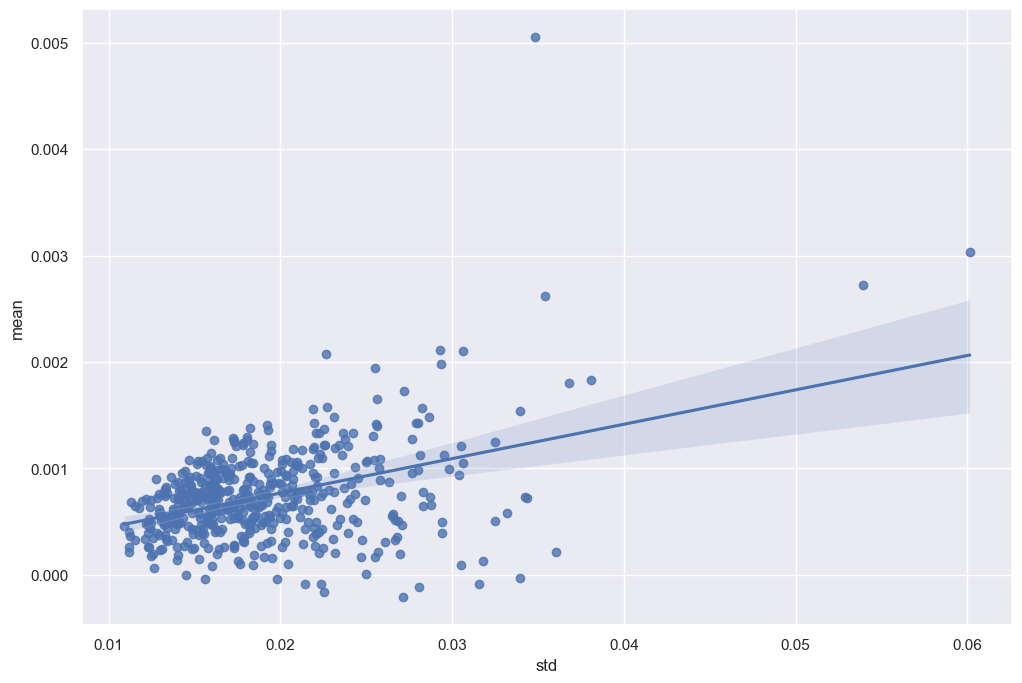

In [37]:
plt.figure(figsize=(12,8))
sns.regplot(x=summaries['std'], y=summaries['mean'])

<Axes: xlabel='Date'>

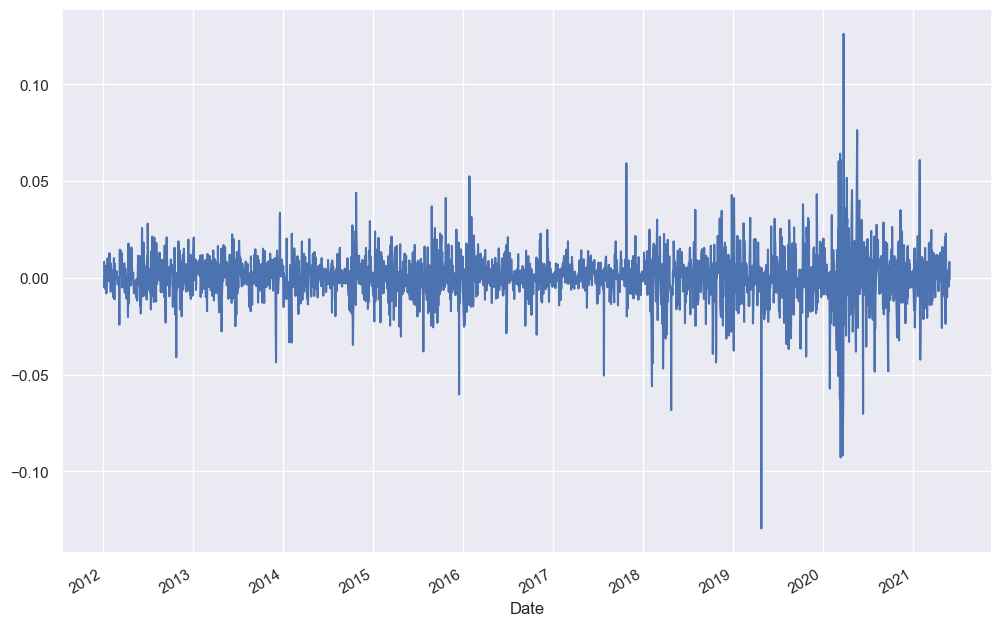

In [38]:
# Recall: individual stock returns are completely random
df_returns['MMM'].plot(figsize=(12, 8))

In [39]:
# The level of randomness **can** vary between and across groups of stocks
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_returns['ACN'].plot(ax=axes[0,0])
df_returns['ADBE'].plot(ax=axes[0,1])
df_returns['XEL'].plot(ax=axes[1,0])
df_returns['ZBRA'].plot(ax=axes[1,1])

<Axes: title={'center': 'Expected Return vs. Total Risk'}, xlabel='std', ylabel='mean'>

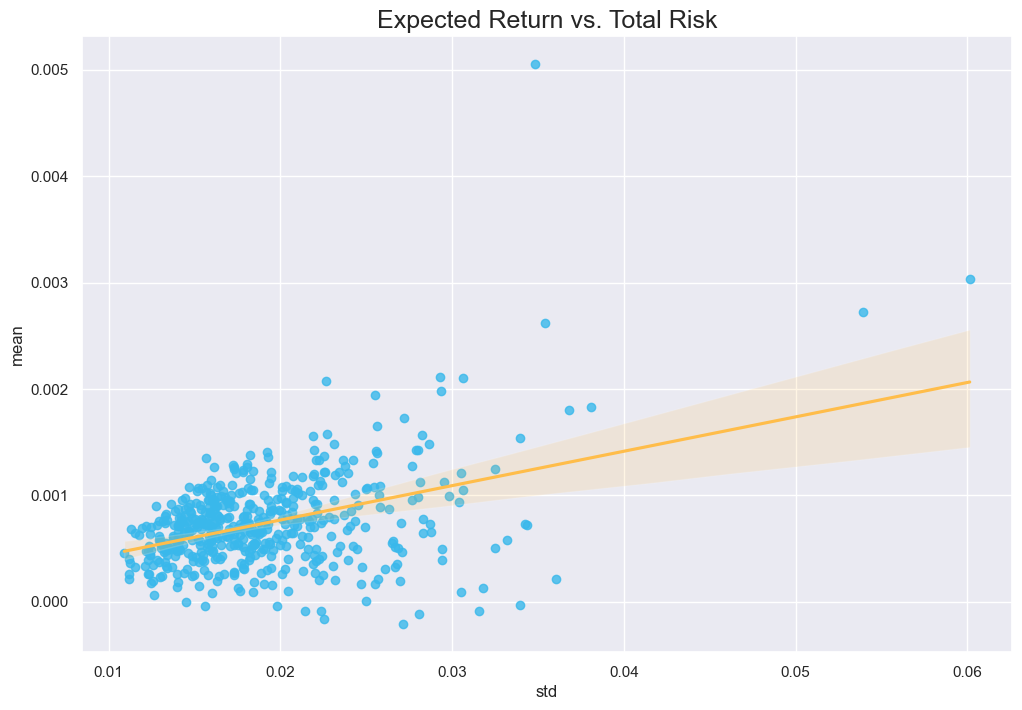

In [40]:
# Plot Expected Returns and Total Risk
plt.figure(figsize=(12, 8))
plt.title("Expected Return vs. Total Risk", fontsize=18)
sns.regplot(y=summaries['mean'], x=summaries['std'],
            scatter_kws={"color": "#39b8eb"}, line_kws={"color": "#ffbd4a"})

<Axes: >

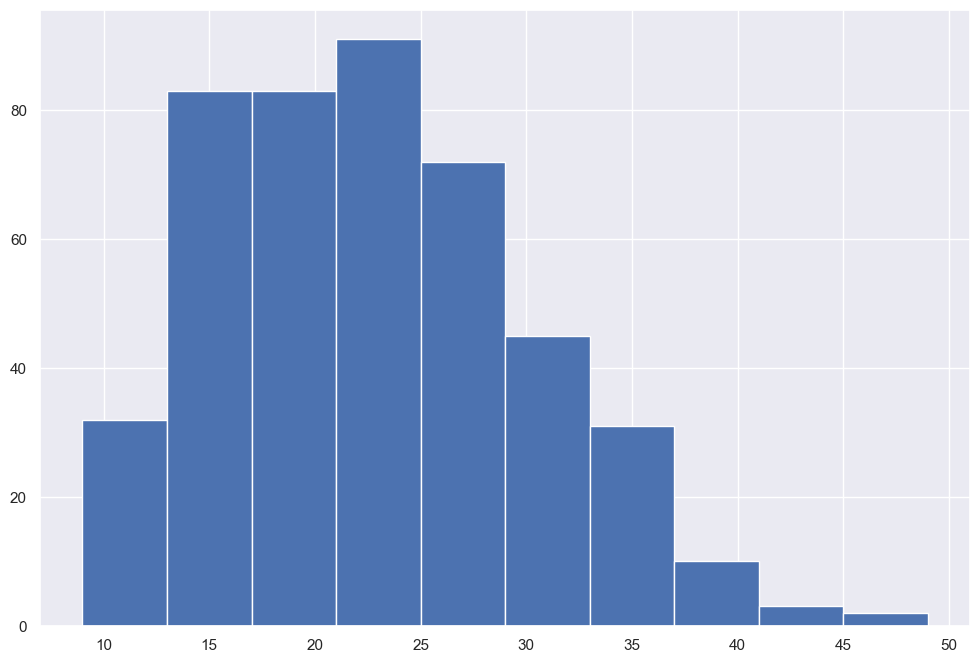

In [44]:
# Explore distribution of ESG Risk across all firms
df_esg['ESG Risk Score'].hist(figsize=(12, 8))

## Evaluating the Relationships between ESG, Returns, & Risk

In [45]:
# Estimate Expected Returns and Total Risk of all stocks
df_master = df_returns.agg(['mean', 'std']).T

In [46]:
df_master.head()

,mean,std
MMM,0.000464,0.013227
ABT,0.000716,0.014076
ABBV,0.000711,0.017848
ABMD,0.001571,0.028260
ACN,0.000812,0.014441


In [47]:
df_master.reset_index(inplace=True)

In [48]:
df_master.head()

,index,mean,std
0,MMM,0.000464,0.013227
1,ABT,0.000716,0.014076
2,ABBV,0.000711,0.017848
3,ABMD,0.001571,0.028260
4,ACN,0.000812,0.014441


In [49]:
df_master.columns = ['Ticker', 'Expected Return', 'Total Risk']

In [50]:
df_master.head()

,Ticker,Expected Return,Total Risk
0,MMM,0.000464,0.013227
1,ABT,0.000716,0.014076
2,ABBV,0.000711,0.017848
3,ABMD,0.001571,0.028260
4,ACN,0.000812,0.014441


In [51]:
# Merge Expected Returns & Total Risk Data with ESG Risk Data
df_master = df_master.merge(df_esg, left_on='Ticker', right_on='Symbol')

In [52]:
df_master.head()

,Ticker,Expected Return,Total Risk,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,0.000464,0.013227,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,0.000716,0.014076,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,0.000711,0.017848,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,0.001571,0.028260,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,0.000812,0.014441,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05


<Axes: xlabel='ESG Risk Score', ylabel='Expected Return'>

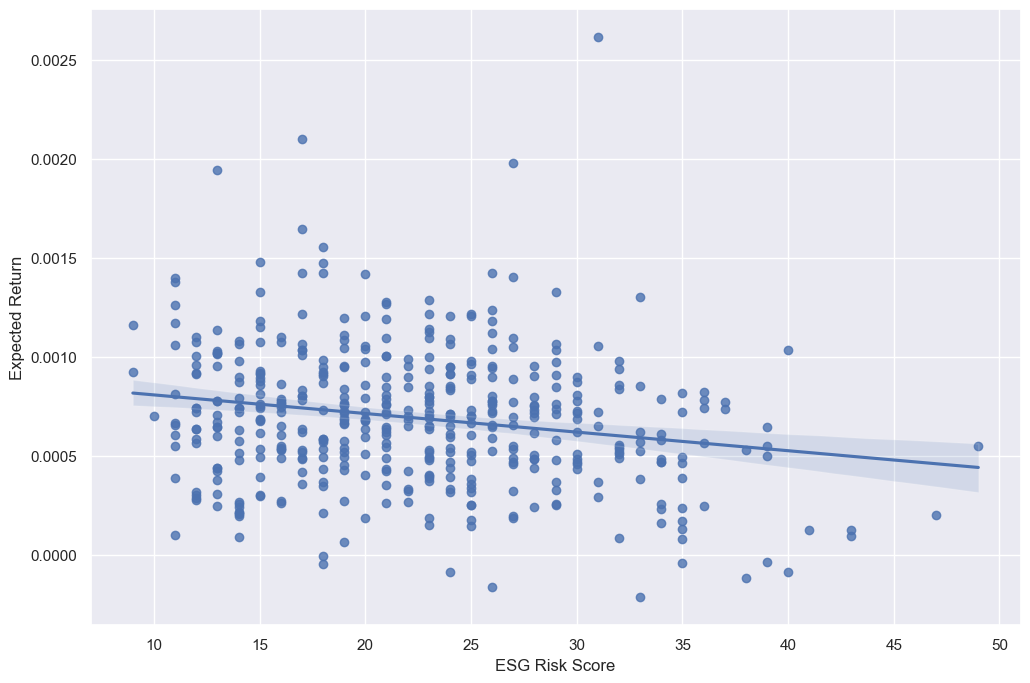

In [53]:
# Relationship between Expected Returns and ESG Risk
plt.figure(figsize=(12, 8))
sns.regplot(y=df_master['Expected Return'], x=df_master['ESG Risk Score'])

<Axes: xlabel='Total Risk', ylabel='Expected Return'>

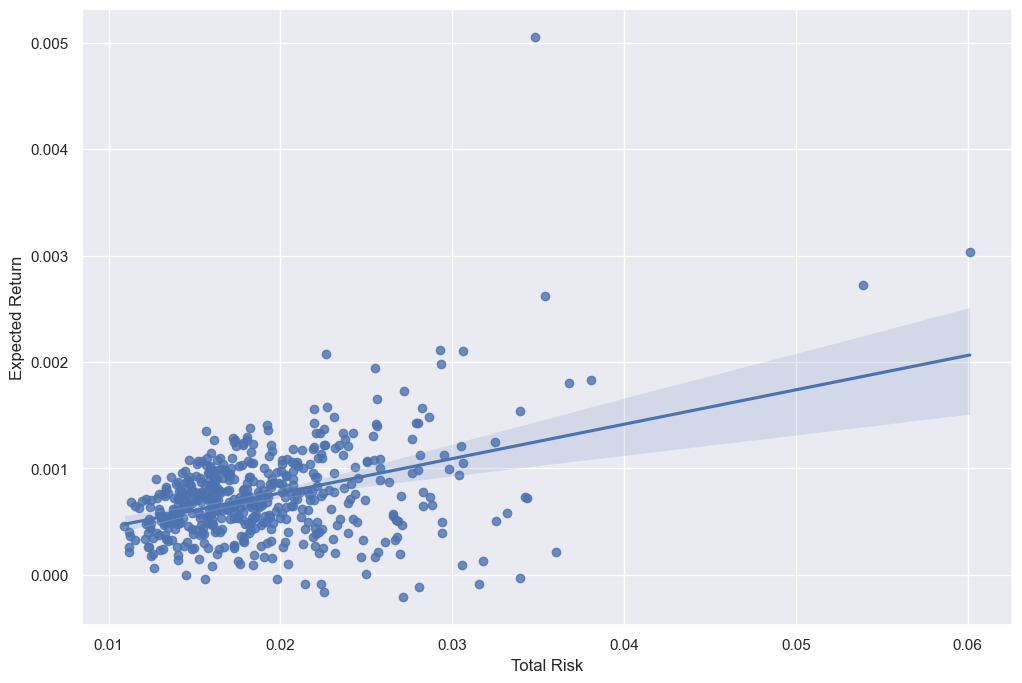

In [54]:
# Relationship between Expected Returns and Total risk
plt.figure(figsize=(12, 8))
sns.regplot(y=df_master['Expected Return'], x=df_master['Total Risk'])

<Axes: xlabel='ESG Risk Score', ylabel='Total Risk'>

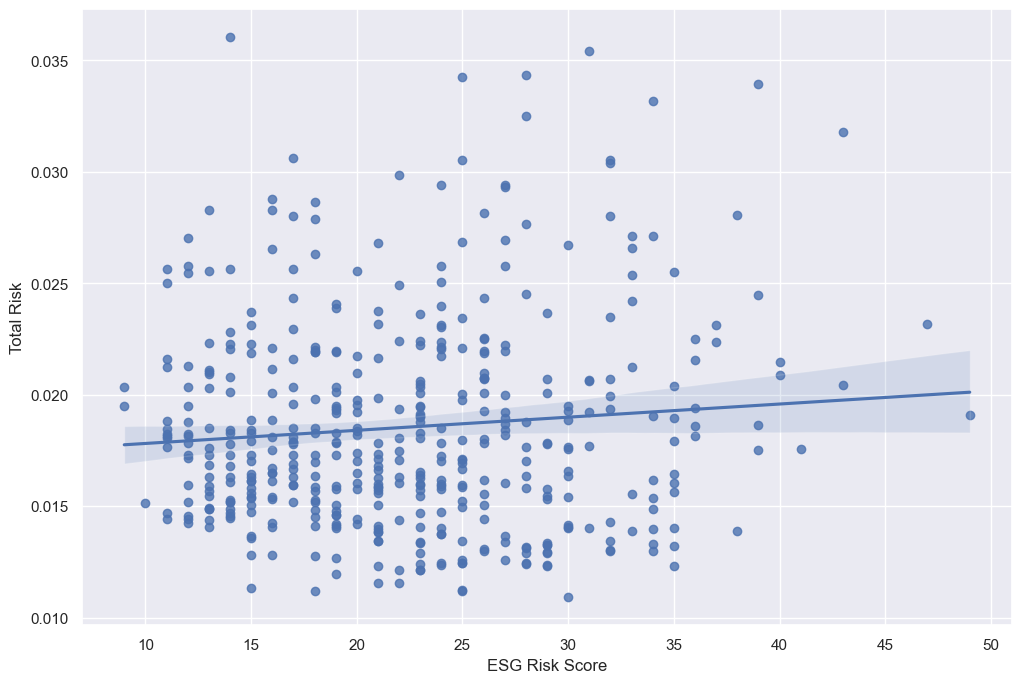

In [55]:
# Relationship between Total Risk and ESG Risk
plt.figure(figsize=(12, 8))
sns.regplot(y=df_master['Total Risk'], x=df_master['ESG Risk Score'])

In [57]:
df_master

,Ticker,Expected Return,Total Risk,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,0.000464,0.013227,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,0.000716,0.014076,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,0.000711,0.017848,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,0.001571,0.028260,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,0.000812,0.014441,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05
...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,0.000568,0.015850,YUM,Yum! Brands Inc,21.0,4.0,12.9,4.4,3.0,2021-05
501,ZBRA,0.001370,0.022562,ZBRA,Zebra Technologies,NaN,NaN,NaN,NaN,NaN,NaN
502,ZBH,0.000612,0.016183,ZBH,Zimmer Biomet,34.0,4.8,18.9,10.5,2.0,2021-05
503,ZION,0.000728,0.020286,ZION,Zions Bancorp,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# select only number type
df_numeric = df_master.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr().round(3)

correlation_matrix


,Expected Return,Total Risk,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level
Expected Return,1.000,0.408,-0.200,-0.265,-0.013,0.015,-0.110
Total Risk,0.408,1.000,0.092,0.105,0.001,0.042,-0.033
ESG Risk Score,-0.200,0.092,1.000,0.694,0.652,0.426,0.286
Environment Risk Score,-0.265,0.105,0.694,1.000,-0.012,-0.148,0.062
Social Risk Score,-0.013,0.001,0.652,-0.012,1.000,0.414,0.345
Governance Risk Score,0.015,0.042,0.426,-0.148,0.414,1.000,0.188
Controversy Level,-0.110,-0.033,0.286,0.062,0.345,0.188,1.000


## Testing hypothesis H1 and H2

In this walkthrough, we'll statistically test and validate our first two hypotheses - H1 and H2.

The t-statistic (for correlation) is calculated as:

$$
tStat_{\rho_{x,y}} = \frac{\rho_{x,y} \sqrt{n - 1}}{\sqrt{1 - \rho_{x,y}^2}}
$$

Where:  
$tStat_{\rho_{x,y}} =$ t-statistic   
$\rho_{x,y} =$ Correlation coefficient  
$n =$ Sample size


In [69]:
df_master

,Ticker,Expected Return,Total Risk,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,0.000464,0.013227,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,0.000716,0.014076,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,0.000711,0.017848,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,0.001571,0.028260,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,0.000812,0.014441,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05
...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,0.000568,0.015850,YUM,Yum! Brands Inc,21.0,4.0,12.9,4.4,3.0,2021-05
501,ZBRA,0.001370,0.022562,ZBRA,Zebra Technologies,NaN,NaN,NaN,NaN,NaN,NaN
502,ZBH,0.000612,0.016183,ZBH,Zimmer Biomet,34.0,4.8,18.9,10.5,2.0,2021-05
503,ZION,0.000728,0.020286,ZION,Zions Bancorp,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Expected Return vs. ESG Risk'}, xlabel='ESG Risk Score', ylabel='Expected Return'>

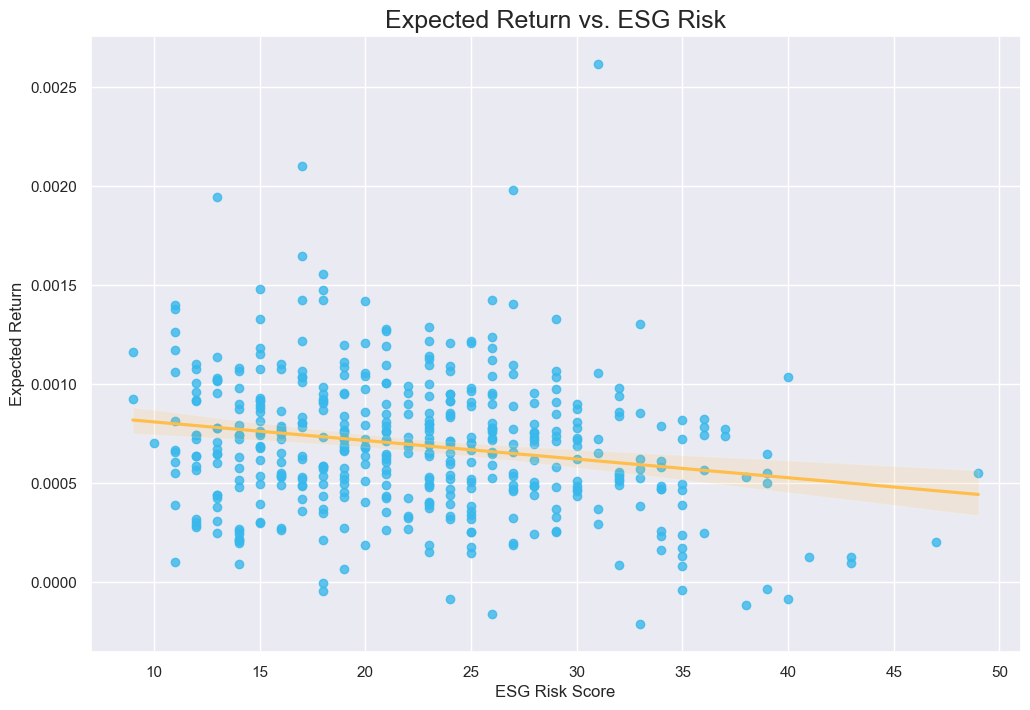

In [70]:
# Plot Expected Returns and ESG Risk
plt.figure(figsize=(12, 8))
plt.title("Expected Return vs. ESG Risk", fontsize=18)
sns.regplot(y=df_master['Expected Return'], x=df_master['ESG Risk Score'],
            scatter_kws={"color": "#39b8eb"}, line_kws={"color": "#ffbd4a"})

<Axes: title={'center': 'Expected Return vs. Total Risk'}, xlabel='Total Risk', ylabel='Expected Return'>

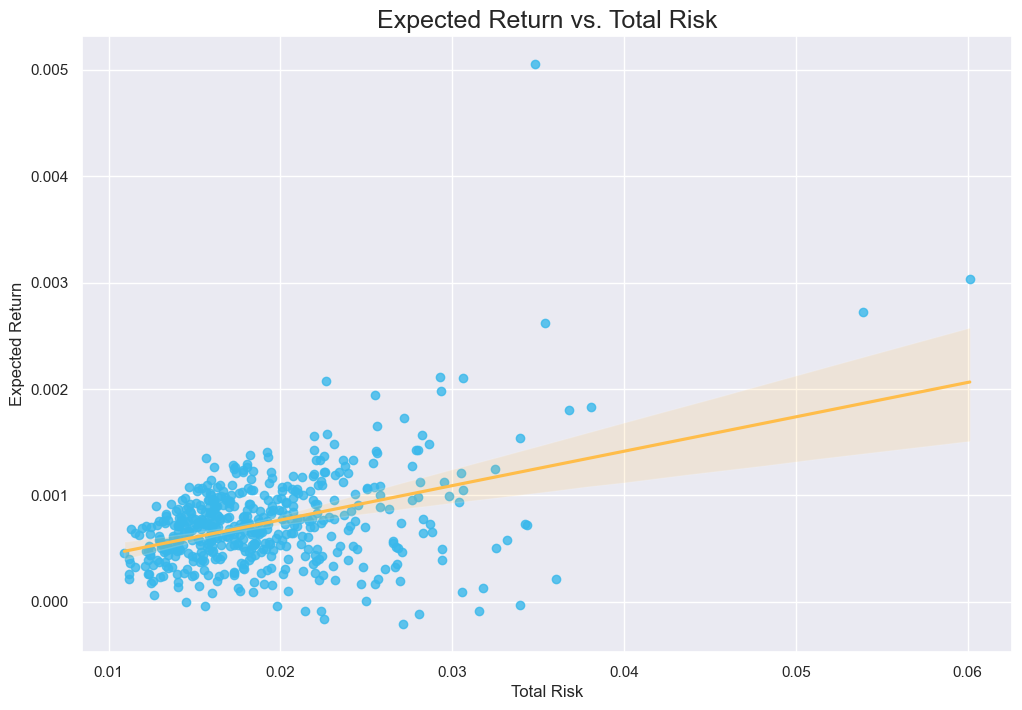

In [71]:
# Plot Expected Returns and Total Risk
plt.figure(figsize=(12, 8))
plt.title("Expected Return vs. Total Risk", fontsize=18)
sns.regplot(y=df_master['Expected Return'], x=df_master['Total Risk'],
            scatter_kws={"color": "#39b8eb"}, line_kws={"color": "#ffbd4a"})

<Axes: title={'center': 'Total Risk vs. ESG Risk'}, xlabel='ESG Risk Score', ylabel='Total Risk'>

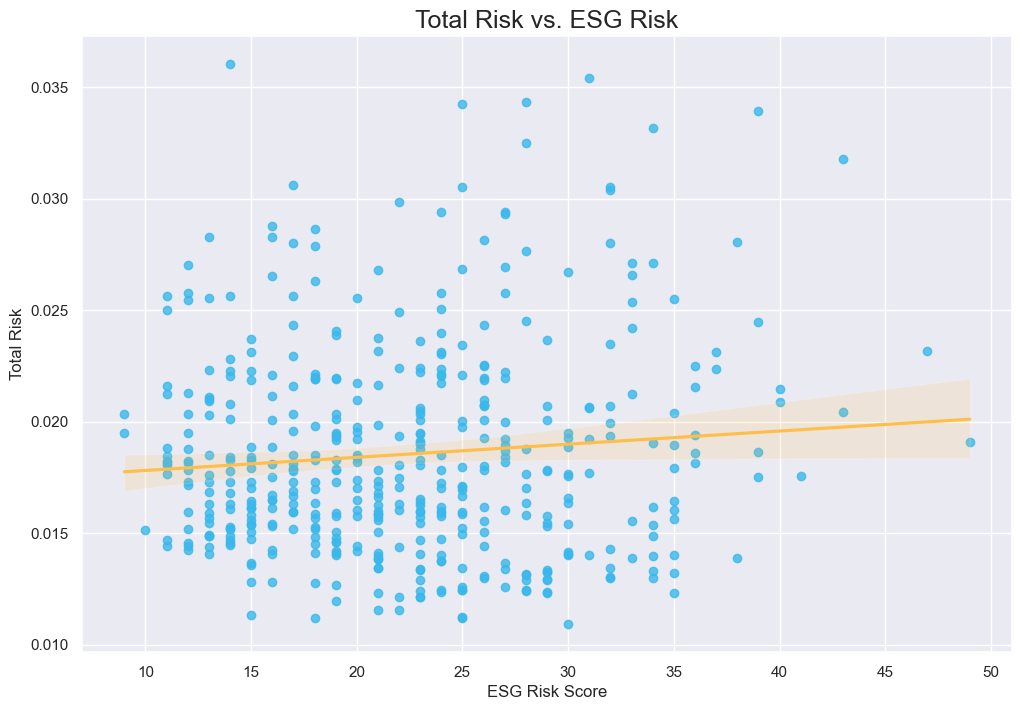

In [72]:
# Plot Total Risk and ESG Risk
plt.figure(figsize=(12, 8))
plt.title("Total Risk vs. ESG Risk", fontsize=18)
sns.regplot(y=df_master['Total Risk'], x=df_master['ESG Risk Score'],
            scatter_kws={"color": "#39b8eb"}, line_kws={"color": "#ffbd4a"})

### Testing H1 and H2
Recall that the t-statistic (for correlation) is calculated as:

$$
tStat_{\rho_{x,y}} = \frac{\rho_{x,y} \sqrt{n - 1}}{\sqrt{1 - \rho_{x,y}^2}}
$$

Where:  
$tStat_{\rho_{x,y}} =$ t-statistic   
$\rho_{x,y} =$ Correlation coefficient  
$n =$ Sample size

In [74]:
# Remove all rows with missing ESG Risk observations 
df_master.dropna(subset=['ESG Risk Score'], inplace=True)
df_master.reset_index(inplace=True, drop=True)

In [75]:
# Correlation between E[r] and ESG Risk
np.corrcoef(df_master['Expected Return'], df_master['ESG Risk Score'])[0][1]

-0.19971672492940193

In [76]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)

    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)

    return t_stat

In [77]:
# H1
t_stat_corr(df=df_master, y='Expected Return', x='ESG Risk Score')

-4.323738953742331

In [78]:
# H2
t_stat_corr(df=df_master, y='Total Risk', x='ESG Risk Score')

1.9697413158028148

In [81]:
# H1 using the pearsonr method
stats.pearsonr(df_master['Expected Return'], df_master['ESG Risk Score'])

PearsonRResult(statistic=-0.19971672492940185, pvalue=1.8904897940404832e-05)

In [82]:
# H2 using the pearsonr method
stats.pearsonr(df_master['Total Risk'], df_master['ESG Risk Score'])

PearsonRResult(statistic=0.09245677237658301, pvalue=0.04948089476053563)

# Estimating ESG Portfolio Returns - Applied

In this walkthrough, we'll estimate the returns of our equally-weighted quintile sorted ESG portfolios.

In [83]:
df_esg

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05
...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,21.0,4.0,12.9,4.4,3.0,2021-05
501,ZBRA,Zebra Technologies,NaN,NaN,NaN,NaN,NaN,NaN
502,ZBH,Zimmer Biomet,34.0,4.8,18.9,10.5,2.0,2021-05
503,ZION,Zions Bancorp,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_esg.dropna(subset=['ESG Risk Score'], inplace=True)
df_esg.reset_index(inplace=True, drop=True)

In [85]:
df_esg.head()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05
4,ATVI,Activision Blizzard,16.0,0.2,9.8,6.2,2.0,2021-05


### Sort Firms into Quintile ESG Buckets

In [86]:
# Quintile Rank Labels
quintile_rank_labels = ['Q' + str(i) for i in range(1, 6)]

In [87]:
quintile_rank_labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

In [88]:
# Sort firms into quintile ESG Buckets
df_esg['Quintile ESG Rank'] = df_esg['ESG Risk Score'].transform(
    lambda x: pd.qcut(x, 5, labels=quintile_rank_labels))

In [89]:
df_esg.head()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date,Quintile ESG Rank
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05,Q5
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05,Q5
3,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05,Q1
4,ATVI,Activision Blizzard,16.0,0.2,9.8,6.2,2.0,2021-05,Q2


In [90]:
df_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.008264,-0.004053,0.009143,-0.007671,-0.000378,-0.007377,-0.010151,-0.003650,0.023444,-0.007426,...,-0.005643,-0.017198,-0.006584,-0.010481,0.033015,0.006648,-0.007559,-0.013534,0.022063,0.000322
2012-01-05 16:00:00,-0.004514,-0.002220,-0.055493,0.008835,-0.019082,0.000000,0.007072,0.000000,0.006363,0.024106,...,0.017319,-0.010445,0.004418,0.008723,-0.014247,0.007783,-0.001410,0.011840,0.028005,0.000645
2012-01-06 16:00:00,-0.005131,-0.008899,0.013189,-0.007115,-0.001733,0.010735,0.008427,-0.005495,0.004637,-0.007305,...,-0.008368,-0.035186,-0.002933,-0.006485,-0.016797,0.007255,-0.008192,0.002600,0.001135,-0.000322
2012-01-09 16:00:00,0.005997,-0.000374,-0.023669,0.003859,-0.001736,-0.003268,-0.006616,0.029466,-0.000280,0.019624,...,-0.008535,-0.002805,0.000735,0.021759,0.003973,-0.003950,-0.004557,0.007410,0.013605,0.031260


In [91]:
# Convert wide-form df_returns into long form to allow for merging with ESG data
df_returns = df_returns.unstack().reset_index()
df_returns.columns = ['Ticker', 'Date', 'Returns']

In [92]:
df_returns

,Ticker,Date,Returns
0,MMM,2012-01-03 16:00:00,NaN
1,MMM,2012-01-04 16:00:00,0.008264
2,MMM,2012-01-05 16:00:00,-0.004514
3,MMM,2012-01-06 16:00:00,-0.005131
4,MMM,2012-01-09 16:00:00,0.005997
...,...,...,...
1195330,ZTS,2021-05-24 16:00:00,NaN
1195331,ZTS,2021-05-25 16:00:00,NaN
1195332,ZTS,2021-05-26 16:00:00,NaN
1195333,ZTS,2021-05-27 16:00:00,NaN


In [93]:
# Merge Returns and ESG Data
df_returns_esg = df_returns.merge(df_esg, left_on='Ticker', right_on='Symbol')

In [94]:
df_returns_esg

,Ticker,Date,Returns,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date,Quintile ESG Rank
0,MMM,2012-01-03 16:00:00,NaN,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
1,MMM,2012-01-04 16:00:00,0.008264,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
2,MMM,2012-01-05 16:00:00,-0.004514,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
3,MMM,2012-01-06 16:00:00,-0.005131,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
4,MMM,2012-01-09 16:00:00,0.005997,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
...,...,...,...,...,...,...,...,...,...,...,...,...
1069879,ZTS,2021-05-24 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,Q2
1069880,ZTS,2021-05-25 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,Q2
1069881,ZTS,2021-05-26 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,Q2
1069882,ZTS,2021-05-27 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,Q2


In [95]:
# Estimate returns of Equal Weighted Quintile Sorted ESG Portfolios
quintile_returns = df_returns_esg.groupby(['Date', 'Quintile ESG Rank'])['Returns'].mean().unstack()

/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_30497/3932923597.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_returns = df_returns_esg.groupby(['Date', 'Quintile ESG Rank'])['Returns'].mean().unstack()


In [96]:
quintile_returns

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
...,...,...,...,...,...
2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449


In [97]:
quintile_returns = quintile_returns.dropna()  # drop missing observations

In [98]:
quintile_returns

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660
...,...,...,...,...,...
2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449


# Exploring Quintile ESG Portfolios

In this walkthrough, we'll explore our quintile sorted equal weighted ESG portfolios

In [106]:
# Stock price dataset
df_price = pd.read_excel('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/data/SP500_Price_Data.xlsx')  # stock price dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price.set_index('Date', inplace=True)

# ESG dataset
df_esg = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/data/SP500_ESG_Data.csv')

# Calculate returns for all stocks
df_returns = df_price.pct_change(1, fill_method=None)

In [107]:
# Sort firms on ESG Risk
df_esg.dropna(subset=['ESG Risk Score'], inplace=True)
df_esg.reset_index(inplace=True, drop=True)

quintile_rank_labels = ['Q' + str(i) for i in range(1, 6)]

df_esg['Quintile ESG Rank'] = df_esg['ESG Risk Score'].transform(
    lambda x: pd.qcut(x, 5, labels=quintile_rank_labels))

In [108]:
# Merge ESG and Returns Data
df_returns = df_returns.unstack().reset_index()
df_returns.columns = ['Ticker', 'Date', 'Returns']

df_returns_esg = df_returns.merge(df_esg, left_on='Ticker', right_on='Symbol')

In [109]:
# Estimate Quintile ESG Portfolio Returns
quintile_returns = df_returns_esg.groupby(['Date', 'Quintile ESG Rank'])['Returns'].mean().unstack()
quintile_returns = quintile_returns.dropna()

/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_30497/3240961129.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_returns = df_returns_esg.groupby(['Date', 'Quintile ESG Rank'])['Returns'].mean().unstack()


In [110]:
quintile_returns

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660
...,...,...,...,...,...
2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449


In [111]:
# Average E[r] across Quintile ESG Portfolios
quintile_returns.mean()

Quintile ESG Rank
Q1    0.000734
Q2    0.000741
Q3    0.000718
Q4    0.000707
Q5    0.000574
dtype: float64

<Axes: title={'center': 'Average E[r] across all Quintile ESG Portfolios'}, xlabel='Quintile ESG Rank'>

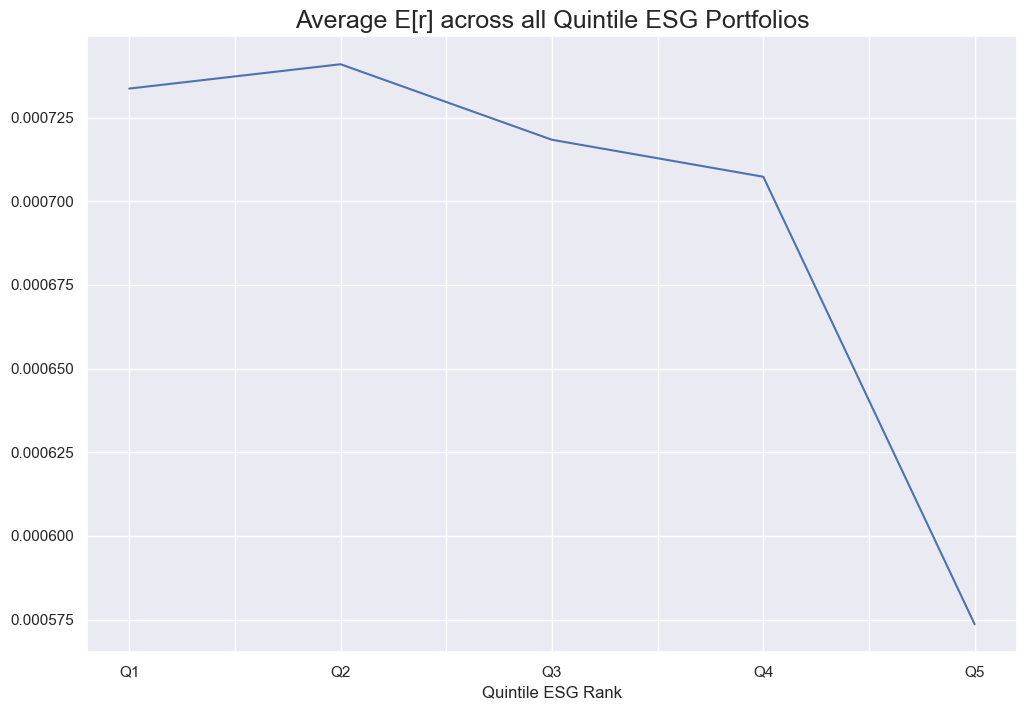

In [112]:
# Explore average E[r] across all Quintile ESG Portfolios
plt.figure(figsize=(12, 8))
plt.title("Average E[r] across all Quintile ESG Portfolios", fontsize=18)
quintile_returns.mean().plot()

<Axes: title={'center': 'Total Risk ($\\sigma$) across all Quintile Portfolios'}, xlabel='Quintile ESG Rank'>

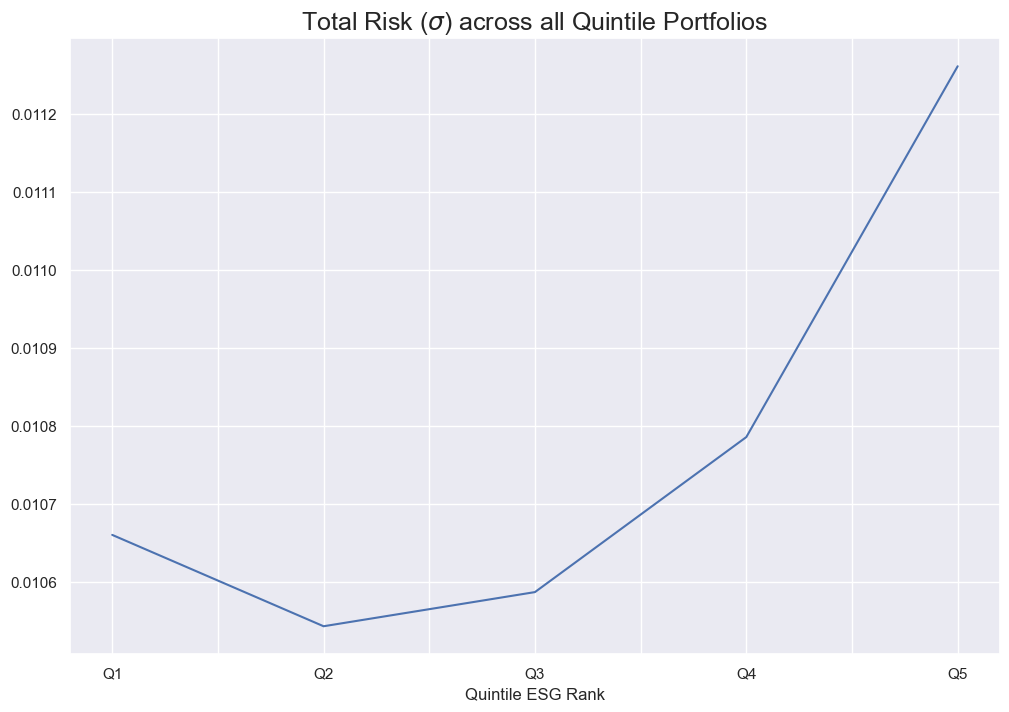

In [113]:
# Explore Total Risk across all Quintile ESG Portfolios
plt.figure(figsize=(12, 8))
plt.title("Total Risk ($\sigma$) across all Quintile Portfolios", fontsize=18)
quintile_returns.std().plot()

In [114]:
# Cumulative Returns across Quintile ESG Portfolios
quintile_returns.cumsum()

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.005128,0.006880,0.005016,-0.000919,0.005284
2012-01-06 16:00:00,0.006016,0.007838,0.004213,-0.000653,0.003038
2012-01-09 16:00:00,0.008482,0.015318,0.006806,0.003807,0.005594
2012-01-10 16:00:00,0.024336,0.029147,0.022173,0.018172,0.015254
...,...,...,...,...,...
2021-05-24 16:00:00,1.728189,1.748058,1.695248,1.669893,1.353573
2021-05-25 16:00:00,1.727422,1.744202,1.691853,1.662955,1.344877
2021-05-26 16:00:00,1.730998,1.748147,1.694191,1.667324,1.350327


In [115]:
# Cumulative Performance across all Quintile ESG Portfolios
1 + quintile_returns.cumsum()

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,0.996515,1.000438,0.998908,0.995181,1.002503
2012-01-05 16:00:00,1.005128,1.006880,1.005016,0.999081,1.005284
2012-01-06 16:00:00,1.006016,1.007838,1.004213,0.999347,1.003038
2012-01-09 16:00:00,1.008482,1.015318,1.006806,1.003807,1.005594
2012-01-10 16:00:00,1.024336,1.029147,1.022173,1.018172,1.015254
...,...,...,...,...,...
2021-05-24 16:00:00,2.728189,2.748058,2.695248,2.669893,2.353573
2021-05-25 16:00:00,2.727422,2.744202,2.691853,2.662955,2.344877
2021-05-26 16:00:00,2.730998,2.748147,2.694191,2.667324,2.350327


<Axes: xlabel='Date'>

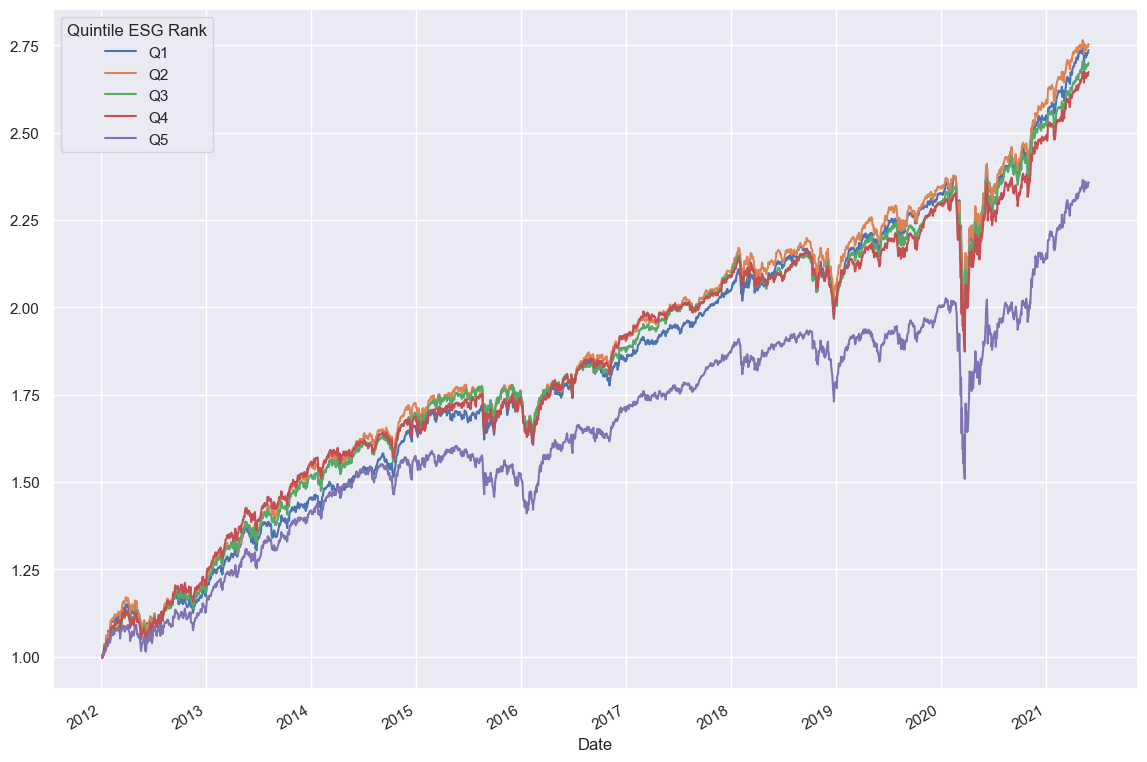

In [116]:
# Explore Cumulative Performance across all Quintile ESG Portfolios
(1 + quintile_returns.cumsum()).plot(figsize=(14, 10))

# Testing and Validating H3

In this walkthrough, we'll statistically test and validate our third hypothesis, H3 (Updated)

*H3 (Updated): The returns of firms with lower ESG Risk are statistically greater than the returns of firms with higher ESG Risk*

### Prep for Testing and Validating H3

In [117]:
df_esg.head()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date,Quintile ESG Rank
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05,Q5
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05,Q5
3,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05,Q1
4,ATVI,Activision Blizzard,16.0,0.2,9.8,6.2,2.0,2021-05,Q2


In [118]:
df_returns_esg.head()

,Ticker,Date,Returns,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date,Quintile ESG Rank
0,MMM,2012-01-03 16:00:00,NaN,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
1,MMM,2012-01-04 16:00:00,0.008264,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
2,MMM,2012-01-05 16:00:00,-0.004514,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
3,MMM,2012-01-06 16:00:00,-0.005131,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5
4,MMM,2012-01-09 16:00:00,0.005997,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05,Q5


In [119]:
quintile_returns

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660
...,...,...,...,...,...
2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449


In [120]:
# Explore Expected Returns across quintile portfolios
quintile_returns.mean()

Quintile ESG Rank
Q1    0.000734
Q2    0.000741
Q3    0.000718
Q4    0.000707
Q5    0.000574
dtype: float64

<Axes: title={'center': 'Average E[r] across ESG Quintile Portfolios'}, xlabel='Quintile ESG Rank'>

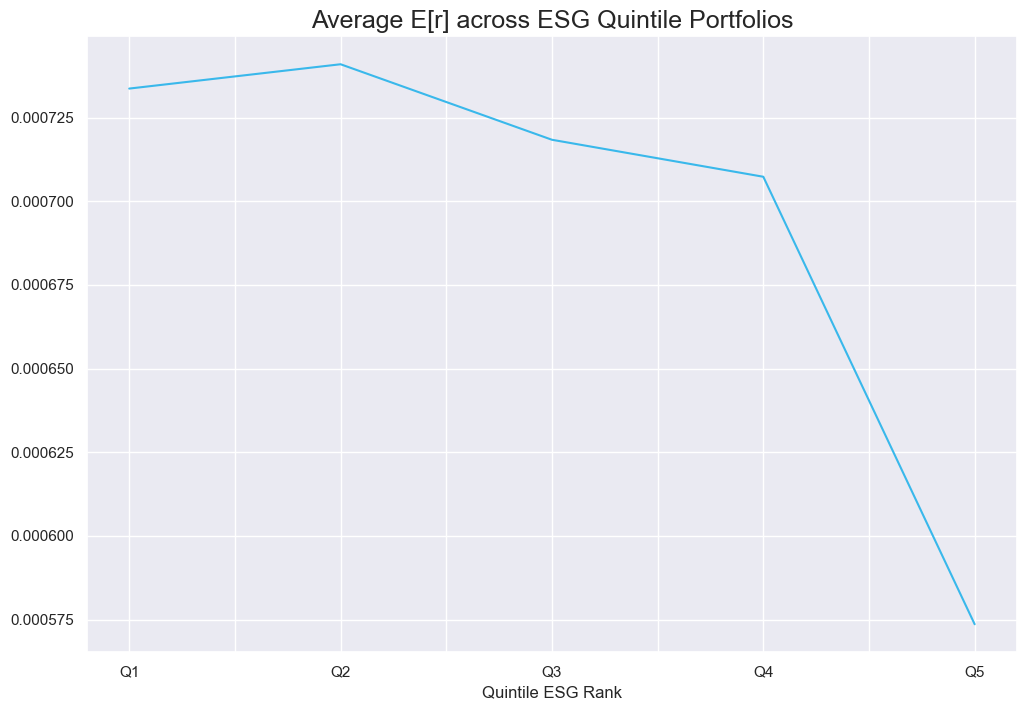

In [121]:
# Visually explore Expected Returns across quintile portfolios
plt.figure(figsize=(12, 8))
plt.title("Average E[r] across ESG Quintile Portfolios", fontsize=18)
quintile_returns.mean().plot(color='#39b8eb')

<Axes: title={'center': 'Total Risk ($\\sigma$) across all Quintile Portfolios'}, xlabel='Quintile ESG Rank'>

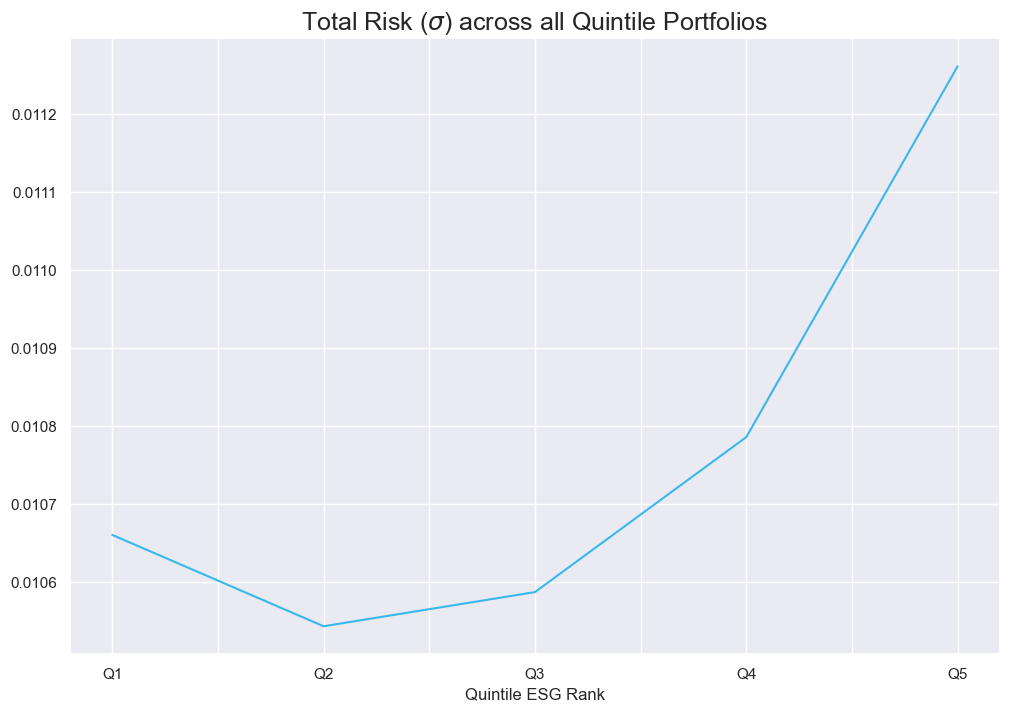

In [122]:
# Visually explore Total Risk across quintile portfolios
plt.figure(figsize=(12, 8))
plt.title("Total Risk ($\sigma$) across all Quintile Portfolios", fontsize=18)
quintile_returns.std().plot(color='#39b8eb')

<Axes: title={'center': 'Cumulative Performance of ESG Quintile Portfolios'}, xlabel='Date'>

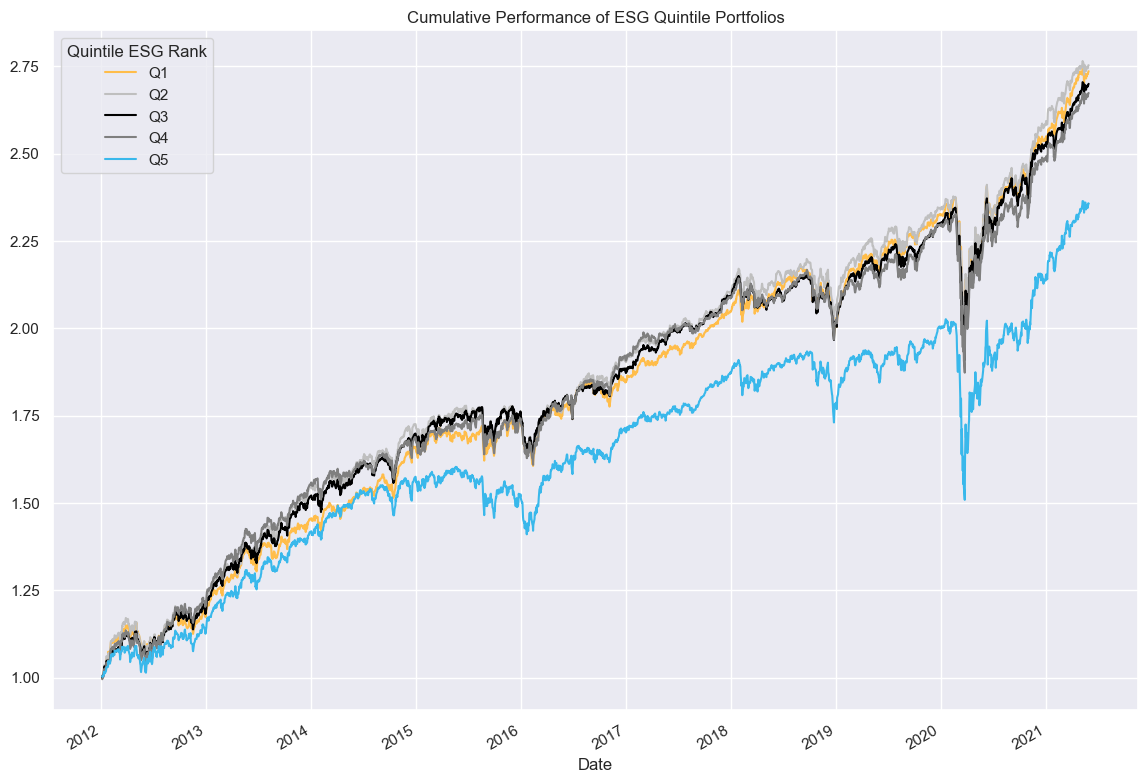

In [123]:
# Visually explore the Cumulative Performance across Quintile Portfolios
plot_colours = ('#FFBD4A', '#BFBFBF', '#000000', '#7F7F7F', '#39B8EB')
(1 + quintile_returns.cumsum()).plot(
    figsize=(14, 10),
    color=plot_colours,
    title="Cumulative Performance of ESG Quintile Portfolios")

### Testing and Validating H3

The test-statistic (tStat) for ESG Portfolios is estimated as:  
$$
tStat = \frac{E[r_{Q1}] - E[r_{Q5}]}{\hat{\sigma}_{r_{Q1}-r_{Q5}} / \sqrt{n}} \equiv \frac{E[r_{Q1 - Q5}]}{\hat{\sigma}_{r_{Q1}-r_{Q5}} / \sqrt{n}}
$$

In [124]:
# Numerator from left hand side tStat equation
quintile_returns['Q1'].mean() - quintile_returns['Q5'].mean()

0.0001600807332185737

In [125]:
# Numerator from right hand side tStat equation
(quintile_returns['Q1'] - quintile_returns['Q5']).mean()

0.00016008073321857356

In [126]:
def t_stat(df, port_low, port_high):
    """Returns the Students t-statistic for the mean difference between 2 groups"""

    difference_returns = df[port_low] - df[port_high]
    mean_difference_returns = difference_returns.mean()
    std_difference_returns = difference_returns.std()
    n = len(df)

    tStat = mean_difference_returns / (std_difference_returns / np.sqrt(n))

    return tStat

In [127]:
# Test and validate H3
t_stat(df=quintile_returns, port_low='Q1', port_high='Q5')

1.72086127624665

In [128]:
# Test and validate H3 using stats.ttest_rel method
stats.ttest_rel(quintile_returns['Q1'], quintile_returns['Q5'])

TtestResult(statistic=1.720861276246652, pvalue=0.08540679307641558, df=2365)

# Testing and Validating H4 - Data Prep

In this walkthrough, we'll learn how to prep our data and get it to a stage where we can test and validate H4.

*H4: A long short ESG Risk strategy yields abnormal returns.*

Using the CAPM framework, we can test for Alpha (i.e., test H4) using the following model:

$$
r_{Q1t} - r_{Q5t} = \alpha + \beta (r_{mt} - r_{f}) + \varepsilon_t
$$

Where:

$r_{Qit} = $ Return on a Quintile ESG portfolio $i$ at time $t$  
$\alpha = $ Intercept term (abnormal return in this context)  
$\beta = $ Slope  
$r_{mt} = $ Return on the market portfolio  
$r_f = $ Risk free rate

In [150]:
quintile_returns

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660
...,...,...,...,...,...
2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449


In [151]:
# Market Return Data
sp500_price = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/data/SP500_Index_Market_Price_Data.csv')  # SP500 Index Price Data
sp500_price['Close'].isna().any()  # Check for missing observations (result == False)
sp500_price['Market Return'] = sp500_price['Close'].pct_change(1)  # Market Return

In [152]:
sp500_price.head()

,Date,Close,Market Return
0,03/01/2012,1277.06,NaN
1,04/01/2012,1277.30,0.000188
2,05/01/2012,1281.06,0.002944
3,06/01/2012,1277.81,-0.002537
4,09/01/2012,1280.70,0.002262


In [153]:
sp500_price.dropna(inplace=True)  # delete NaN return observation
sp500_price.reset_index(inplace=True, drop=True)

In [133]:
sp500_price.head()

,Date,Close,Market Return
0,04/01/2012,1277.30,0.000188
1,05/01/2012,1281.06,0.002944
2,06/01/2012,1277.81,-0.002537
3,09/01/2012,1280.70,0.002262
4,10/01/2012,1292.08,0.008886


In [154]:
quintile_returns

Quintile ESG Rank,Q1,Q2,Q3,Q4,Q5
Date,,,,,
2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660
...,...,...,...,...,...
2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449


In [155]:
import os
# Restructure format of the dataframe for Quintile Returns
quintile_returns.to_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/results/temp.csv')
ols_data = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/results/temp.csv')
os.remove('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/data-driven-investing/results/temp.csv')

In [156]:
ols_data

,Date,Q1,Q2,Q3,Q4,Q5
0,2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503
1,2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781
2,2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246
3,2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556
4,2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660
...,...,...,...,...,...,...
2361,2021-05-24 16:00:00,0.007341,0.004538,0.005078,0.004466,0.005315
2362,2021-05-25 16:00:00,-0.000768,-0.003856,-0.003395,-0.006939,-0.008696
2363,2021-05-26 16:00:00,0.003576,0.003945,0.002338,0.004370,0.005449
2364,2021-05-27 16:00:00,0.002896,0.004763,0.004000,0.005677,0.007420


In [157]:
# Combine Market Return and Quintile ESG Portfolio Returns
# NOTE: this approach is okay only because we KNOW that the dates in both dataframes line-up by default
ols_data['Market Return'] = sp500_price['Market Return']

In [158]:
# Average daily 10 Year risk-free rate
ols_data['Risk Free Rate'] = 0.02 / 250

In [159]:
ols_data.head()

,Date,Q1,Q2,Q3,Q4,Q5,Market Return,Risk Free Rate
0,2012-01-04 16:00:00,-0.003485,0.000438,-0.001092,-0.004819,0.002503,0.000188,0.00008
1,2012-01-05 16:00:00,0.008613,0.006442,0.006108,0.003900,0.002781,0.002944,0.00008
2,2012-01-06 16:00:00,0.000888,0.000959,-0.000803,0.000266,-0.002246,-0.002537,0.00008
3,2012-01-09 16:00:00,0.002465,0.007480,0.002593,0.004460,0.002556,0.002262,0.00008
4,2012-01-10 16:00:00,0.015855,0.013829,0.015367,0.014365,0.009660,0.008886,0.00008


In [160]:
# Excess Market Returns (independent variable)
ols_data['Excess Market Return'] = ols_data['Market Return'] - ols_data['Risk Free Rate']

In [161]:
# Low minus Short Portfolios (dependent variable)
ols_data['Q1 minus Q5'] = ols_data['Q1'] - ols_data['Q5']

In [162]:
# Cleaning up
ols_data.drop(columns=ols_data.columns[1:6], inplace=True)

In [163]:
# OLS Regression Data
ols_data

,Date,Market Return,Risk Free Rate,Excess Market Return,Q1 minus Q5
0,2012-01-04 16:00:00,0.000188,0.00008,0.000108,-0.005988
1,2012-01-05 16:00:00,0.002944,0.00008,0.002864,0.005833
2,2012-01-06 16:00:00,-0.002537,0.00008,-0.002617,0.003134
3,2012-01-09 16:00:00,0.002262,0.00008,0.002182,-0.000091
4,2012-01-10 16:00:00,0.008886,0.00008,0.008806,0.006195
...,...,...,...,...,...
2361,2021-05-24 16:00:00,0.009911,0.00008,0.009831,0.002026
2362,2021-05-25 16:00:00,-0.002125,0.00008,-0.002205,0.007928
2363,2021-05-26 16:00:00,0.001877,0.00008,0.001797,-0.001873
2364,2021-05-27 16:00:00,0.001165,0.00008,0.001085,-0.004524


# Testing and Validating H4 - Regression

In this walkthrough, we'll test and validate H4 (i.e., test for the presence of Alpha)

*H4: A long short ESG Risk strategy yields abnormal returns.*

Using the CAPM framework, we can test for Alpha (i.e., test H4) using the following model:

$$
r_{Q1t} - r_{Q5t} = \alpha + \beta (r_{mt} - r_{f}) + \varepsilon_t
$$

Where:

$r_{Qit} = $ Return on a Quintile ESG portfolio $i$ at time $t$  
$\alpha = $ Intercept term (abnormal return in this context)  
$\beta = $ Slope  
$r_{mt} = $ Return on the market portfolio  
$r_f = $ Risk free rate

In [166]:
import statsmodels.api as sm
# Setup Regression variables
y = ols_data['Q1 minus Q5']  # long minus short ESG portfolio
X = ols_data['Excess Market Return']
X = sm.add_constant(X)  # include intercept term in regression

In [167]:
model = sm.OLS(y, X)  # set regression model
result = model.fit()  # run regression model

In [168]:
# OLS Regression Results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q1 minus Q5   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.789
Date:                Mon, 29 Jul 2024   Prob (F-statistic):            0.00923
Time:                        14:19:24   Log-Likelihood:                 9418.8
No. Observations:                2366   AIC:                        -1.883e+04
Df Residuals:                    2364   BIC:                        -1.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0002    9.3e-05      1.840      0.066   -1.12e-05       0.000
Excess Market Return    -0.0232      0.009     -2.605      0.009      -0.041      -0.006
==============================================================================
Omnibus:                      298.465   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3280.803
Skew:                           0.059   Prob(JB):                         0.00
Kurtosis:                       8.768   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# Extract core parameter values
result.params

const                   0.000171
Excess Market Return   -0.023179
dtype: float64

In [170]:
# Extract value for Alpha
result.params[0]

/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_30497/3685190607.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0]


0.00017117279009246184

In [171]:
# Extract value for Alpha (alternative approach)
result.params['const']

0.00017117279009246184

In [172]:
# Annualised Alpha (crude method)
result.params['const'] * 250

0.04279319752311546

In [173]:
# Annualised Alpha (sophisticated method)
(1 + result.params['const']) ** 250 - 1

0.04371820602491705

In [174]:
# Correlation between Long minus Short ESG portfolio and Market Return
np.corrcoef(ols_data['Q1 minus Q5'], ols_data['Market Return'])[0][1]

-0.05351104132978039

In [175]:
# Correlation between Long minus Short ESG portfolio and Excess Market Return
np.corrcoef(ols_data['Q1 minus Q5'], ols_data['Excess Market Return'])[0][1]

-0.05351104132978039